In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from matplotlib import pyplot as plt
import math

In [2]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28, 1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
#y_train = keras.utils.to_categorical(y_train, num_classes)
#y_test = keras.utils.to_categorical(y_test, num_classes)



x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


[5 0 4 1]


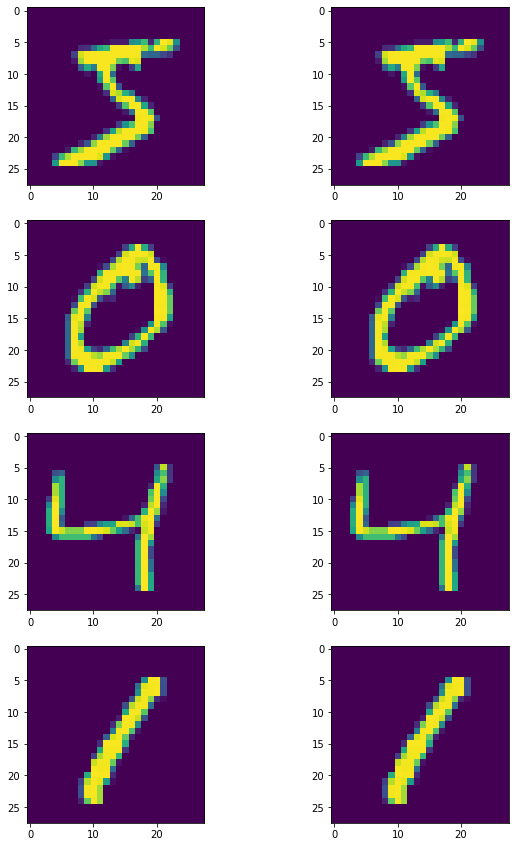

In [3]:
# View Data
_, ax = plt.subplots(4, 2, figsize=(10, 15))

print(y_train[:4])

for i, samples in enumerate(x_train[:4]):
    dig = (samples * 255).astype(np.uint8).reshape((28,28))
    
    ax[i, 0].imshow(dig)
    ax[i, 1].imshow(dig)
plt.show()

In [4]:
# Filter classes



training_zip = zip(x_train,y_train)
train_f0 = []
train_f1 = []
train_f2 = []
train_f3 = []
train_f4 = []
train_f5 = []
train_f6 = []
train_f7 = []
train_f8 = []
train_f9 = []

for i, data in enumerate(training_zip):
    if data[1] == 0:
        train_f0.append(data[0])
    elif data[1] == 1:
        train_f1.append(data[0])
    elif data[1] == 2:
        train_f2.append(data[0])
    elif data[1] == 3:
        train_f3.append(data[0])
    elif data[1] == 4:
        train_f4.append(data[0])
    elif data[1] == 5:
        train_f5.append(data[0])
    elif data[1] == 6:
        train_f6.append(data[0])
    elif data[1] == 7:
        train_f7.append(data[0])
    elif data[1] == 8:
        train_f8.append(data[0])
    elif data[1] == 9:
        train_f9.append(data[0])
  

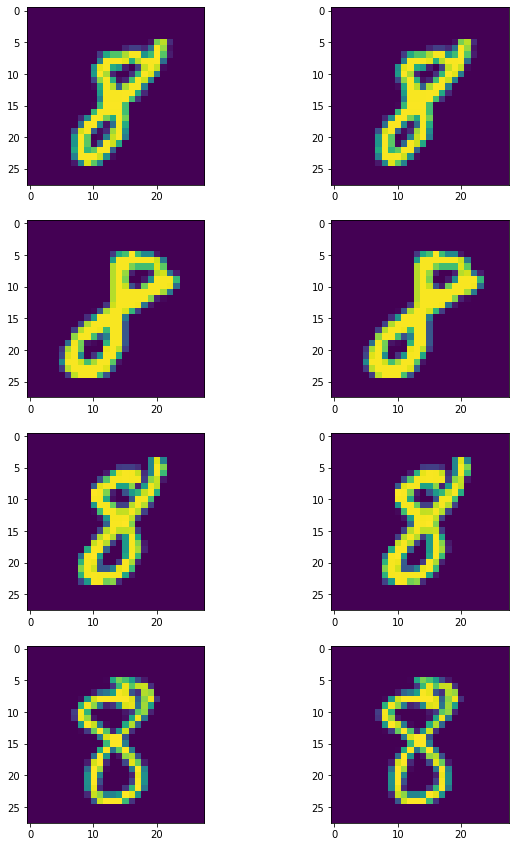

In [5]:
# View Data
_, ax = plt.subplots(4, 2, figsize=(10, 15))



for i, samples in enumerate(train_f8[:4]):
    dig = (samples * 255).astype(np.uint8).reshape((28,28))
    
    ax[i, 0].imshow(dig)
    ax[i, 1].imshow(dig)
plt.show()

In [65]:
def model_parts():
    input_shape = (512,512,1)
    model_enc = keras.Sequential(
        [
            

            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2D(64, kernel_size=(3, 3), padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2D(128, kernel_size=(3, 3), padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2D(128, kernel_size = (3,3), padding='same' ),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2D(64, kernel_size=(3,3), padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.UpSampling2D(size=(2,2)),
            layers.Conv2D(64, kernel_size = (3,3), padding = 'same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2D(32, kernel_size = (3,3), padding = 'same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2D(1, kernel_size = (3,3), activation = 'sigmoid', padding = 'same')
        ]
    )
    
    model_dec = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2D(64, kernel_size=(3, 3), padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2D(128, kernel_size=(3, 3), padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2D(128, kernel_size = (3,3), padding='same' ),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2D(64, kernel_size=(3,3), padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.UpSampling2D(size=(2,2)),
            layers.Conv2D(64, kernel_size = (3,3), padding = 'same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2D(32, kernel_size = (3,3), padding = 'same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2D(1, kernel_size = (3,3), activation = 'sigmoid', padding = 'same')
        ]
    )



    model_dis = keras.Sequential(
        [
            keras.Input(shape=input_shape),
            layers.Conv2D(32, kernel_size=(3, 3), padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2D(64, kernel_size=(3, 3), padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(64, kernel_size=(3, 3), padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Conv2D(128, kernel_size=(3, 3), padding='same'),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.MaxPooling2D(pool_size=(2, 2)),
            layers.Conv2D(128, kernel_size = (3,3), padding='same' ),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Flatten(),
            layers.Dense(64),
            layers.BatchNormalization(),
            layers.ReLU(),
            layers.Dense(1, activation = 'sigmoid')
        ]

    )
    return(model_enc, model_dec, model_dis)

In [68]:
#cycle gan

class MyModel(tf.keras.Model):

    def __init__(self,model_encode, model_decode, model_discrim, lambda_cycle = 10):
        super(MyModel, self).__init__()
        self.enc = model_encode
        self.dec = model_decode
        self.dis = model_discrim
        self.lambda_cycle = lambda_cycle


    def call(self, batch_data, training = True):
        real_x, real_y = batch_data[0], batch_data[1]
        fake_y = self.enc(real_x, training=training)
        
            
        # Cycle: x -> y -> x
        cycled_x = self.dec(fake_y, training=training)
        #id_map = self.enc(real_y, training=training)

        # Discriminator output
        disc_real_y = self.dis(real_y, training=training)
        disc_fake_y = self.dis(fake_y, training=training)
        
        return cycled_x, disc_real_y, disc_fake_y
    
adv_loss_fn = keras.losses.MeanSquaredError()

# Define the loss function for the generators
def generator_loss_fn(fake):
    fake_loss = adv_loss_fn(tf.ones_like(fake), fake)
    return fake_loss


# Define the loss function for the discriminators
def discriminator_loss_fn(real, fake):
    real_loss = adv_loss_fn(tf.ones_like(real), real)
    fake_loss = adv_loss_fn(tf.zeros_like(fake), fake)
    return (real_loss + fake_loss) * 0.5 

#@tf.function
def train_step(model, batch_data, loss_fns, optimizers,lambda_cycle = 10):
    
    generator_loss_fn = loss_fns[0]
    cycle_loss_fn = loss_fns[1]
    disc_loss_fn = loss_fns[2]
    
    gen_enc_optimizer = optimizers[0][0]
    disc_optimizer = optimizers[1][0]
    
    with tf.GradientTape(persistent=True) as tape:
        cycled_x, disc_real_y, disc_fake_y = model(batch_data)

        gen_enc_loss = generator_loss_fn(disc_fake_y)
        gen_cycle_loss = cycle_loss_fn(batch_data[0], cycled_x) * lambda_cycle
       
        # Discriminator loss
        disc_loss = disc_loss_fn(disc_real_y, disc_fake_y)

        # Get the gradients for the generators
        grads_encod = tape.gradient(gen_enc_loss, model.enc.trainable_variables)
        grads_cycle = tape.gradient(gen_cycle_loss, model.enc.trainable_variables+model.dec.trainable_variables)

        # Get the gradients for the discriminators
        grads_disc = tape.gradient(disc_loss, model.dis.trainable_variables)

        # Update the weights of the generators
        gen_enc_optimizer.apply_gradients(zip(grads_encod, model.enc.trainable_variables))
        gen_enc_optimizer.apply_gradients(zip(grads_cycle, model.enc.trainable_variables + model.dec.trainable_variables))

        # Update the weights of the discriminators
        disc_optimizer.apply_gradients(zip(grads_disc, model.dis.trainable_variables))

    return {
        "Gen_loss": gen_enc_loss,
        "Cycle_loss": gen_cycle_loss,
        "Disc_loss": disc_loss,
    }



In [7]:
# Loss functions

adv_loss_fn = keras.losses.MeanSquaredError()

# Define the loss function for the generators
def generator_loss_fn(fake):
    fake_loss = adv_loss_fn(tf.ones_like(fake), fake)
    return fake_loss


# Define the loss function for the discriminators
def discriminator_loss_fn(real, fake):
    real_loss = adv_loss_fn(tf.ones_like(real), real)
    fake_loss = adv_loss_fn(tf.zeros_like(fake), fake)
    return (real_loss + fake_loss) * 0.5

In [8]:
class GANMonitor(keras.callbacks.Callback):
    """A callback to generate and save images after each epoch"""

    def __init__(self, num_img=4):
        self.num_img = num_img

    def on_epoch_end(self, epoch, logs=None):
        _, ax = plt.subplots(4, 2, figsize=(12, 12))
        if epoch % 10 == 0:
            for i, img in enumerate(train_f0[:4]):
                prediction = cycle_gan_model.enc(img.reshape(1,28,28,1)).numpy()
                prediction = (prediction * 255).astype(np.uint8).reshape(28,28)
                img = (img *255).astype(np.uint8).reshape(28,28)

                ax[i, 0].imshow(img)
                ax[i, 1].imshow(prediction)
                ax[i, 0].set_title("Input image")
                ax[i, 1].set_title("Translated image")
                ax[i, 0].axis("off")
                ax[i, 1].axis("off")

            plt.show()
            plt.close()

In [9]:


# Here, `x_set` is list of path to the images
# and `y_set` are the associated classes.

class MNISTSequence(tf.keras.utils.Sequence):

    def __init__(self, x_set, y_set, batch_size):
        self.x, self.y = x_set, y_set
        self.batch_size = batch_size

    def __len__(self):
        return math.ceil(len(self.x) / self.batch_size)

    def __getitem__(self, idx):
        batch_x = self.x[idx * self.batch_size:(idx + 1) *
        self.batch_size]
        batch_y = self.y[idx * self.batch_size:(idx + 1) *
        self.batch_size]

        return np.array([
            np.array(batch_x), np.array(batch_y)])

In [100]:
# Training
#model_enc, model_dec, model_dis = model_parts()
# Create cycle gan model
cycle_gan_model = MyModel(model_enc,model_dec, model_dis,lambda_cycle=0.5)

# Callbacks
plotter = GANMonitor()
checkpoint_filepath = "./model_checkpoints/cyclegan_checkpoints.{epoch:03d}"
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath
)
#print(train_f0[:3000].shape)
dataset_x = tf.data.Dataset.from_tensor_slices(np.array(train_f0[:3000]))
dataset_y = tf.data.Dataset.from_tensor_slices(np.array(train_f8[:3000]))

train_loss_encod = tf.keras.metrics.Mean('loss_encode', dtype=tf.float32)
train_loss_cycle = tf.keras.metrics.Mean('loss_cycle', dtype=tf.float32)
train_loss_disc = tf.keras.metrics.Mean('loss_disc', dtype=tf.float32)

# Optimizers
gen_opt=keras.optimizers.Adam(learning_rate=1e-4),
dis_opt=keras.optimizers.Adam(learning_rate=1e-4),

for i in range(200):
    batches_x = dataset_x.shuffle(buffer_size = 3000).batch(32, drop_remainder=True) 
    batches_y = dataset_y.shuffle(buffer_size = 3000).batch(32, drop_remainder=True)                                            
    for step, x in enumerate(zip(batches_x,batches_y)):
        #(model, batch_data, loss_fns, optimizers,lambda_cycle = 10, training = True)
        losses = train_step(model = cycle_gan_model, batch_data =x,
                            loss_fns = (generator_loss_fn, adv_loss_fn, discriminator_loss_fn),
                            optimizers = [gen_opt, dis_opt],
                           lambda_cycle = 1)
        train_loss_encod(losses["Gen_loss"]) 
        train_loss_cycle(losses["Cycle_loss"])
        train_loss_disc(losses["Disc_loss"])
        
    print("Epoch:", i, "Loss_Transform:", float(train_loss_encod.result()),
          "Loss_Cycle", float(train_loss_cycle.result()),
          "Loss_Discriminator:", float(train_loss_disc.result()))
    train_loss_encod.reset_states()
    train_loss_cycle.reset_states()
    train_loss_disc.reset_states()

Epoch: 0 Loss_Transform: 0.26044413447380066 Loss_Cycle 0.031191840767860413 Loss_Discriminator: 0.24769607186317444
Epoch: 1 Loss_Transform: 0.2637753486633301 Loss_Cycle 0.031893886625766754 Loss_Discriminator: 0.24917955696582794
Epoch: 2 Loss_Transform: 0.26865729689598083 Loss_Cycle 0.030200228095054626 Loss_Discriminator: 0.24931471049785614
Epoch: 3 Loss_Transform: 0.26521027088165283 Loss_Cycle 0.02903185598552227 Loss_Discriminator: 0.24420613050460815
Epoch: 4 Loss_Transform: 0.25342458486557007 Loss_Cycle 0.022162344306707382 Loss_Discriminator: 0.24918584525585175
Epoch: 5 Loss_Transform: 0.2586166262626648 Loss_Cycle 0.021622629836201668 Loss_Discriminator: 0.24935069680213928
Epoch: 6 Loss_Transform: 0.25175192952156067 Loss_Cycle 0.023076649755239487 Loss_Discriminator: 0.24711200594902039
Epoch: 7 Loss_Transform: 0.31168627738952637 Loss_Cycle 0.03946061432361603 Loss_Discriminator: 0.23727306723594666
Epoch: 8 Loss_Transform: 0.2578441798686981 Loss_Cycle 0.02377572283

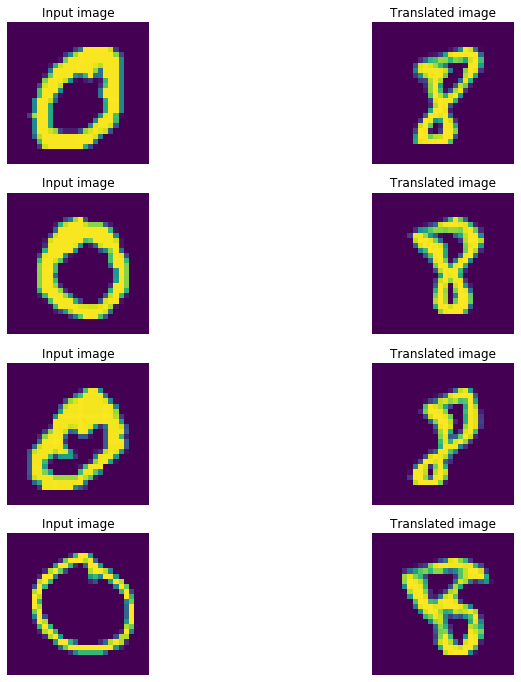

In [102]:

_, ax = plt.subplots(4, 2, figsize=(12, 12))

for i, img in enumerate(train_f0[4:8]):
    prediction = cycle_gan_model.enc(img.reshape(1,28,28,1)).numpy()
    prediction = (prediction * 255).astype(np.uint8).reshape(28,28)
    img = (img *255).astype(np.uint8).reshape(28,28)

    ax[i, 0].imshow(img)
    ax[i, 1].imshow(prediction)
    ax[i, 0].set_title("Input image")
    ax[i, 1].set_title("Translated image")
    ax[i, 0].axis("off")
    ax[i, 1].axis("off")

    #prediction = keras.preprocessing.image.array_to_img(prediction)
    #prediction.save(
    #    "generated_img_{i}_{epoch}.png".format(i=i, epoch=epoch + 1)
    #)
plt.show()
plt.close()

In [50]:
l1 = [1, 2]
l2 = [3,4]
print(l1+l2)

[1, 2, 3, 4]
